In [1]:
import zxingcpp
from IPython.display import display
from PIL import Image
from treepoem import generate_barcode

In [2]:
def generate_barcode_image(gtin, serial_number, expiry_date, batch_number):
    # Generate datamatrix
    datamatrix = generate_barcode(
        barcode_type="gs1datamatrix",
        data=f"(01){gtin}(21){serial_number}(10){batch_number}(17){expiry_date}",
        options={"parsefnc": True, "format": "square", "version": "26x26"},
    )

    # Resize datamatrix to desired size
    dm_size_px = (120, 120)
    datamatrix = datamatrix.resize(dm_size_px, Image.Resampling.NEAREST)

    # Create white picture
    picture_size_px = (140, 140)
    picture = Image.new("L", picture_size_px, color="white")

    # Position the datamatrix
    barcode_position_px = (10, 10)
    picture.paste(datamatrix, barcode_position_px)

    # Save the image
    # picture.save("datamatrix.png")
    return picture


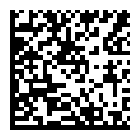

In [3]:
gtin = "01234567890128"
serial_number = "01234567891011"
expiry_date = "250731"
batch_number = "DATAMATRIXTEST"

barcode_image = generate_barcode_image(gtin, serial_number, expiry_date, batch_number)
display(barcode_image)

In [4]:
results = zxingcpp.read_barcodes(barcode_image)
for r in results:
    print(f"Raw: {r.bytes}")
    print(f"Text: {r.text}")
    print(f"Format: {r.format.name}")

Raw: b'01012345678901282101234567891011\x1d10DATAMATRIXTEST\x1d17250731'
Text: (01)01234567890128(21)01234567891011(10)DATAMATRIXTEST(17)250731
Format: DataMatrix
